In [31]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset (update with the correct path if needed)
data = pd.read_csv("C:/Users/subik/Downloads/archive (4)/UK_Accident.csv")

In [88]:
# Display the first few rows of the dataset
print(data.head(4))

   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  1                   1   
1  -0.211708  51.520075             1                  2                   1   
2  -0.206458  51.525301             1                  2                   2   
3  -0.173862  51.482442             1                  2                   1   

   Number_of_Casualties  ...                         Light_Conditions  \
0                     1  ...           Daylight: Street light present   
1                     1  ...  Darkness: Street lights pre

In [90]:
# Display summary statistics
print(data.describe())

         Unnamed: 0  Location_Easting_OSGR  Location_Northing_OSGR  \
count  1.504150e+06           1.504049e+06            1.504150e+06   
mean   2.530433e+05           4.396214e+05            3.001382e+05   
std    1.489162e+05           9.511616e+04            1.610218e+05   
min    0.000000e+00           6.495000e+04            0.000000e+00   
25%    1.253452e+05           3.750600e+05            1.782600e+05   
50%    2.506910e+05           4.399600e+05            2.688000e+05   
75%    3.760370e+05           5.230600e+05            3.981500e+05   
max    5.700100e+05           6.553700e+05            1.208800e+06   

          Longitude      Latitude  Police_Force  Accident_Severity  \
count  1.504049e+06  1.504150e+06  1.504150e+06       1.504150e+06   
mean  -1.436625e+00  5.258587e+01  3.020536e+01       1.838190e+00   
std    1.398078e+00  1.512524e+00  2.551603e+01       4.018423e-01   
min   -7.516225e+00  0.000000e+00  1.000000e+00       0.000000e+00   
25%   -2.373902e+00

In [15]:
# Check for any missing values
print(data.isnull().sum())

Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

In [23]:
# Convert the accident time to hour if it's not already in that format
data['Accident_Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour
print(data['Time'].head())
data['Time'] = data['Time'].fillna('00:00')  
# Or another placeholder value
data['Accident_Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

0    17:42
1    17:36
2    00:15
3    10:35
4    21:13
Name: Time, dtype: object


C:\Users\subik\AppData\Local\Temp\ipykernel_10128\3970405314.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Accident_Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


In [25]:
# Group by accident severity and count accidents
severity_pattern = data.groupby('Accident_Severity')['Accident_Index'].count()
print("Accidents by Severity:\n", severity_pattern)

Accidents by Severity:
 Accident_Severity
1      19441
2     204504
3    1280205
Name: Accident_Index, dtype: int64


In [27]:
# Group by weather conditions and count accidents
weather_pattern = data.groupby('Weather_Conditions')['Accident_Index'].count()
print("Accidents by Weather Conditions:\n", weather_pattern)

Accidents by Weather Conditions:
 Weather_Conditions
Fine with high winds            18355
Fine without high winds       1203943
Fog or mist                      8190
Other                           33503
Raining with high winds         20813
Raining without high winds     177663
Snowing with high winds          1960
Snowing without high winds      11301
Unknown                         28422
Name: Accident_Index, dtype: int64


In [29]:
# Group by time of day (hour)
time_pattern = data.groupby('Accident_Hour')['Accident_Index'].count()
print("Accidents by Hour of Day:\n", time_pattern)

Accidents by Hour of Day:
 Accident_Hour
0      23142
1      16890
2      13618
3      10827
4       8347
5      12035
6      25832
7      62374
8     109622
9      74901
10     67895
11     78135
12     89225
13     91362
14     91262
15    116266
16    122131
17    133739
18    104085
19     77728
20     57216
21     45749
22     39891
23     31878
Name: Accident_Index, dtype: int64


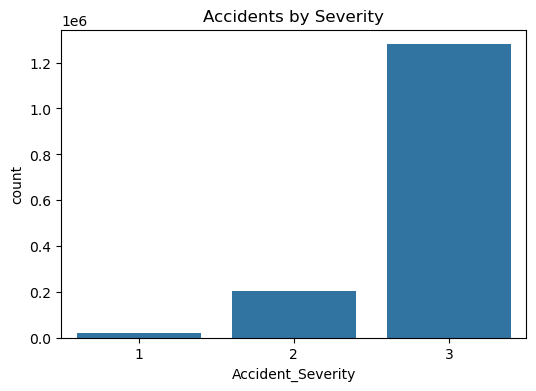

In [35]:
# Plot accidents by severity
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Accident_Severity', order=severity_pattern.index)
plt.title('Accidents by Severity')
plt.show()

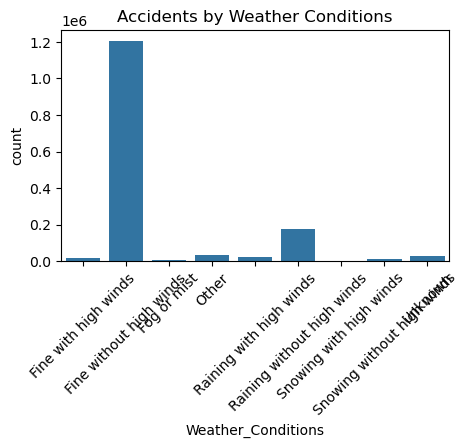

In [41]:
# Plot accidents by weather conditions
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Weather_Conditions', order=weather_pattern.index)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

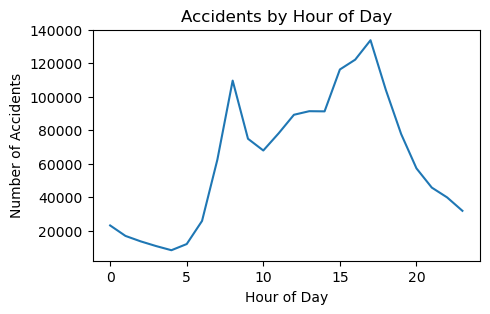

In [39]:
# Plot accidents by hour of day
plt.figure(figsize=(5, 3))
sns.lineplot(x=time_pattern.index, y=time_pattern.values)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

In [70]:
# Create a correlation matrix
correlation = data[['Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Accident_Hour']].corr()

In [72]:
# Check if all columns are numeric before correlation
numeric_data = data[['Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Accident_Hour']].apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values in these columns
numeric_data = numeric_data.dropna()

In [74]:
# Calculate correlation matrix
correlation = numeric_data.corr()
print("Correlation Matrix:\n",correlation)

Correlation Matrix:
                          Accident_Severity  Weather_Conditions  \
Accident_Severity                 1.000000            0.030247   
Weather_Conditions                0.030247            1.000000   
Road_Surface_Conditions           0.006391            0.509618   
Accident_Hour                     0.001982            0.005469   

                         Road_Surface_Conditions  Accident_Hour  
Accident_Severity                       0.006391       0.001982  
Weather_Conditions                      0.509618       0.005469  
Road_Surface_Conditions                 1.000000      -0.026556  
Accident_Hour                          -0.026556       1.000000  


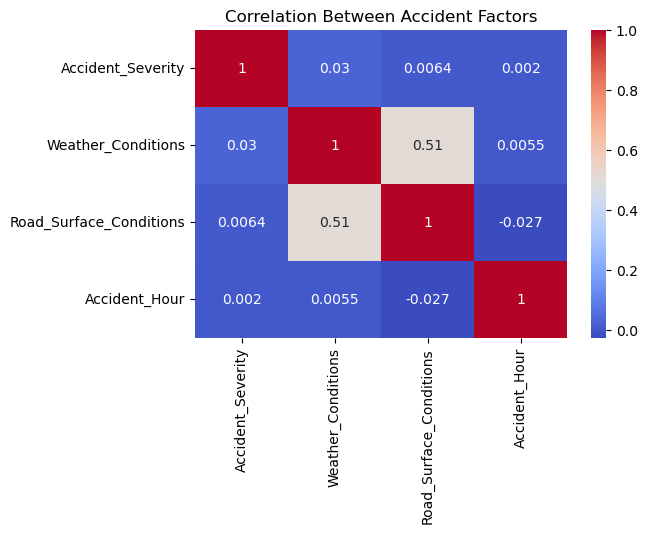

In [84]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Accident Factors')
plt.show()